In [22]:
# Import libraries
import pandas as pd
# Load dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
# View
print(train_df.head())
print(train_df.describe())
print(train_df.info())
print(test_df.head())
print(test_df.describe())
print(test_df.info())

   date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...  V3  V4  V5  V6  V7  V8  \
0        0   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
1        1   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
2        2   0   0   0   1   0   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
3        3   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   
4        4   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   

   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0 NaN        -0.002421        0.000301                      -0.003038  
1 NaN        -0.008495        0.000303                      -0.009114  
2 NaN        -0.009624        0.000301                      -0.010243  
3 NaN         0.004662        0.000299                       0.004046  
4 NaN        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]
           date_id           D1           D2           D3           D4

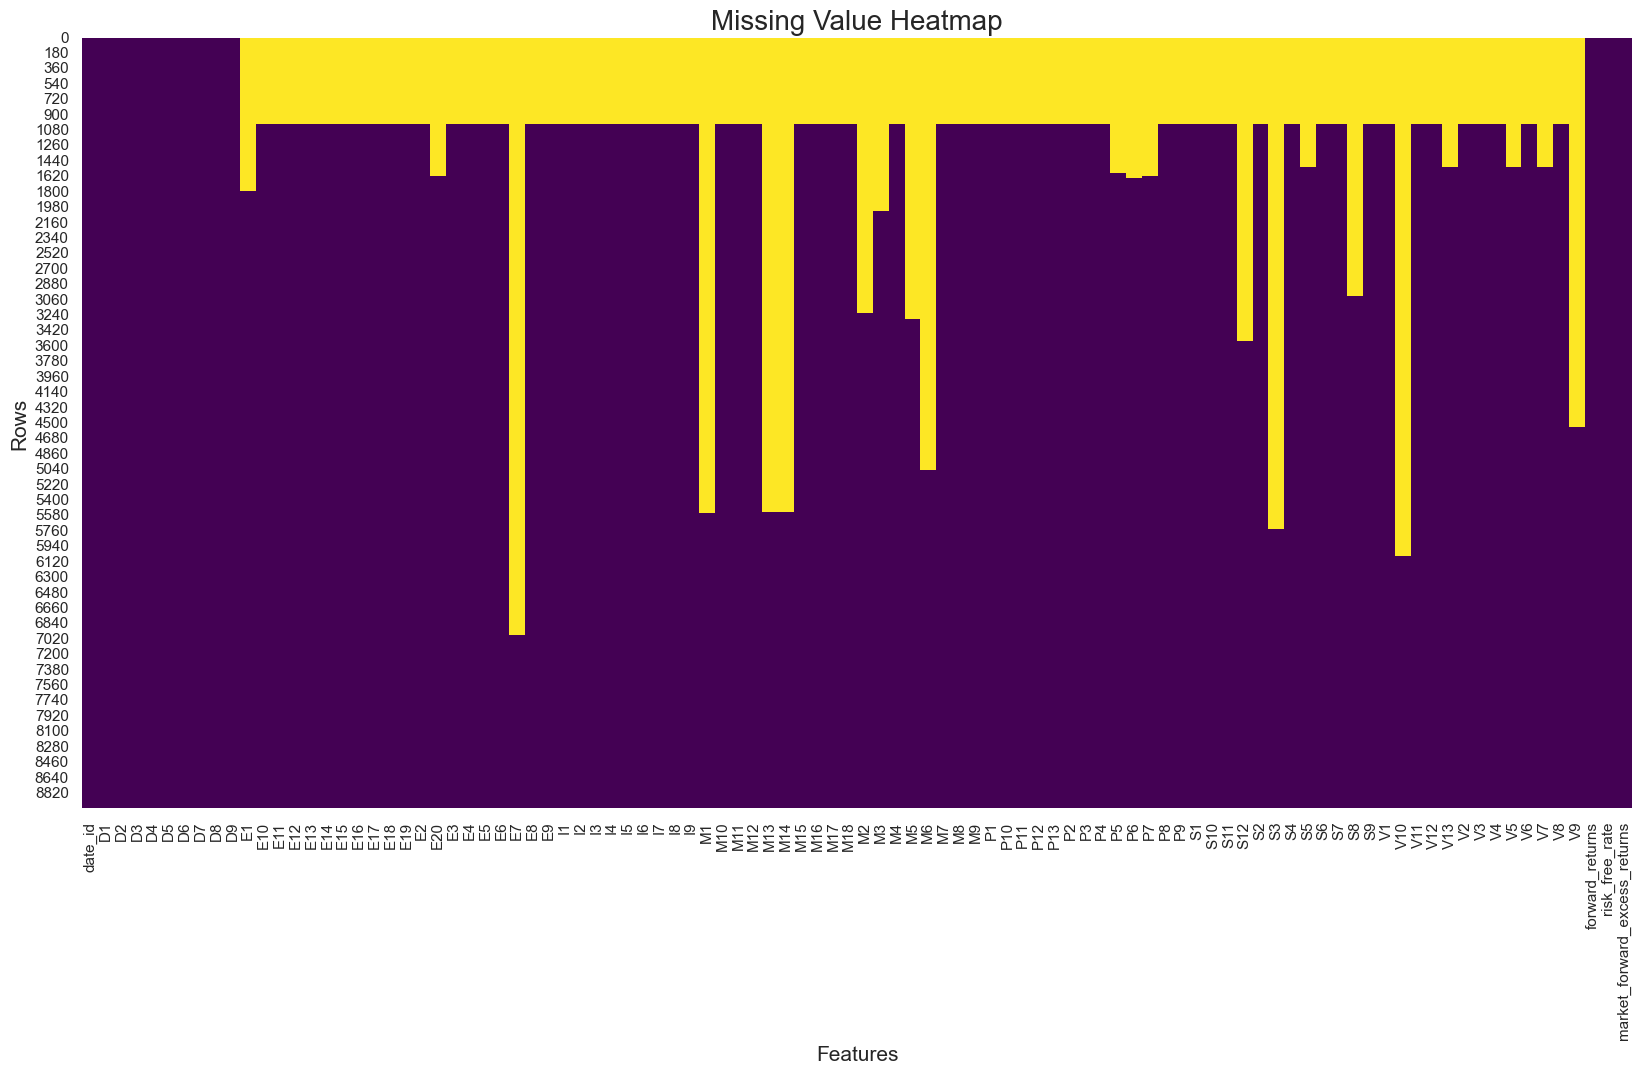

Percentage of missing values per feature:
E7     77.519466
V10    67.285873
S3     63.770857
M1     61.701891
M13    61.624027
M14    61.624027
M6     56.095662
V9     50.489433
S12    39.343715
M5     36.518354
M2     35.784205
S8     33.470523
M3     22.447164
E1     19.844271
P6     18.220245
E20    17.975528
P7     17.975528
P5     17.508343
V5     16.818687
V13    16.807564
dtype: float64


In [23]:
import matplotlib.pylab as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize = (20, 10))

sns.heatmap(train_df.isnull(), cbar=False, cmap = "viridis", ax = ax)

ax.set_title("Missing Value Heatmap", fontsize=20)
ax.set_xlabel("Features", fontsize=15)
ax.set_ylabel("Rows", fontsize = 15)

plt.show()

missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

print("Percentage of missing values per feature:")
print(missing_percentage.sort_values(ascending=False).head(20))
